# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Random Images From Training Set:


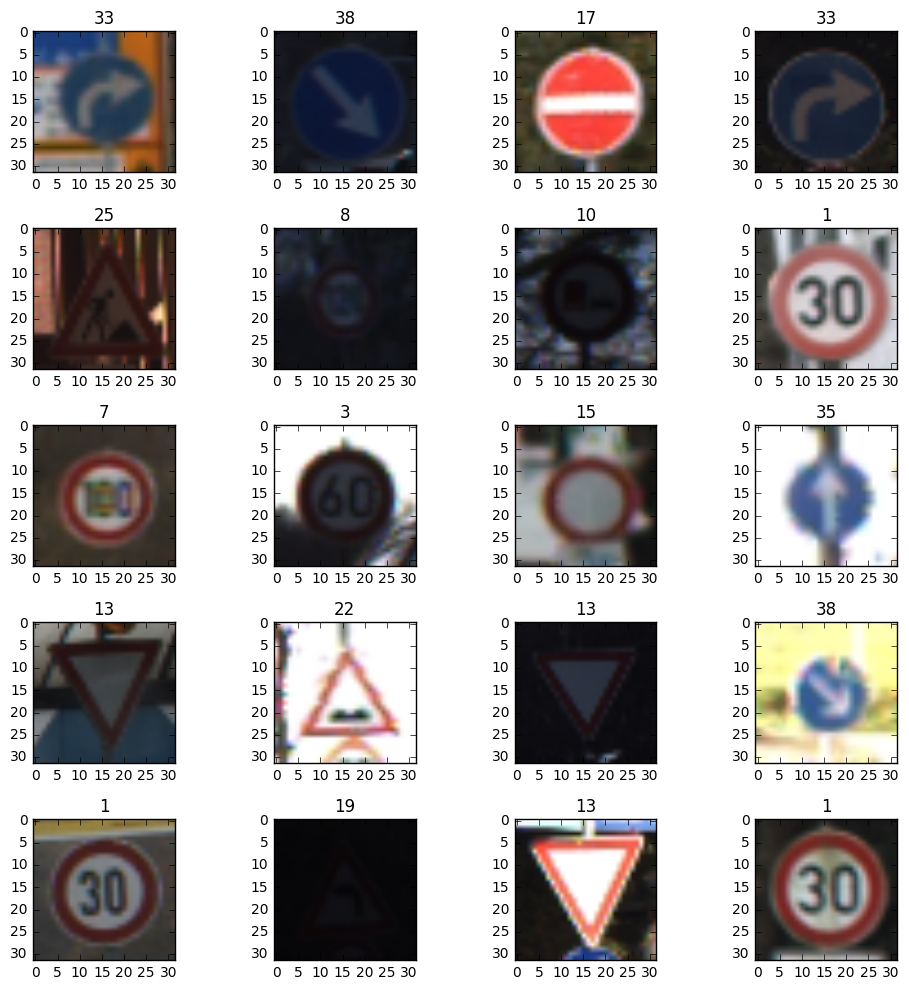

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

#Visualization of Training Set 
print("Random Images From Training Set:")
fig = plt.figure(figsize=(10,10))

# Display 20 random images from training set 
for i in range(0,20):
    index = random.randint(0, len(X_train)) # Generate a random index in the range of X_train 
    image = X_train[index].squeeze()
    
    # Generate a 5 x 4 array of subplots with each subplot containing its corresponding label index number
    ax = fig.add_subplot(5,4,i+1)
    fig.tight_layout()
    ax.imshow(image)
    plt.title(y_train[index])
plt.show()

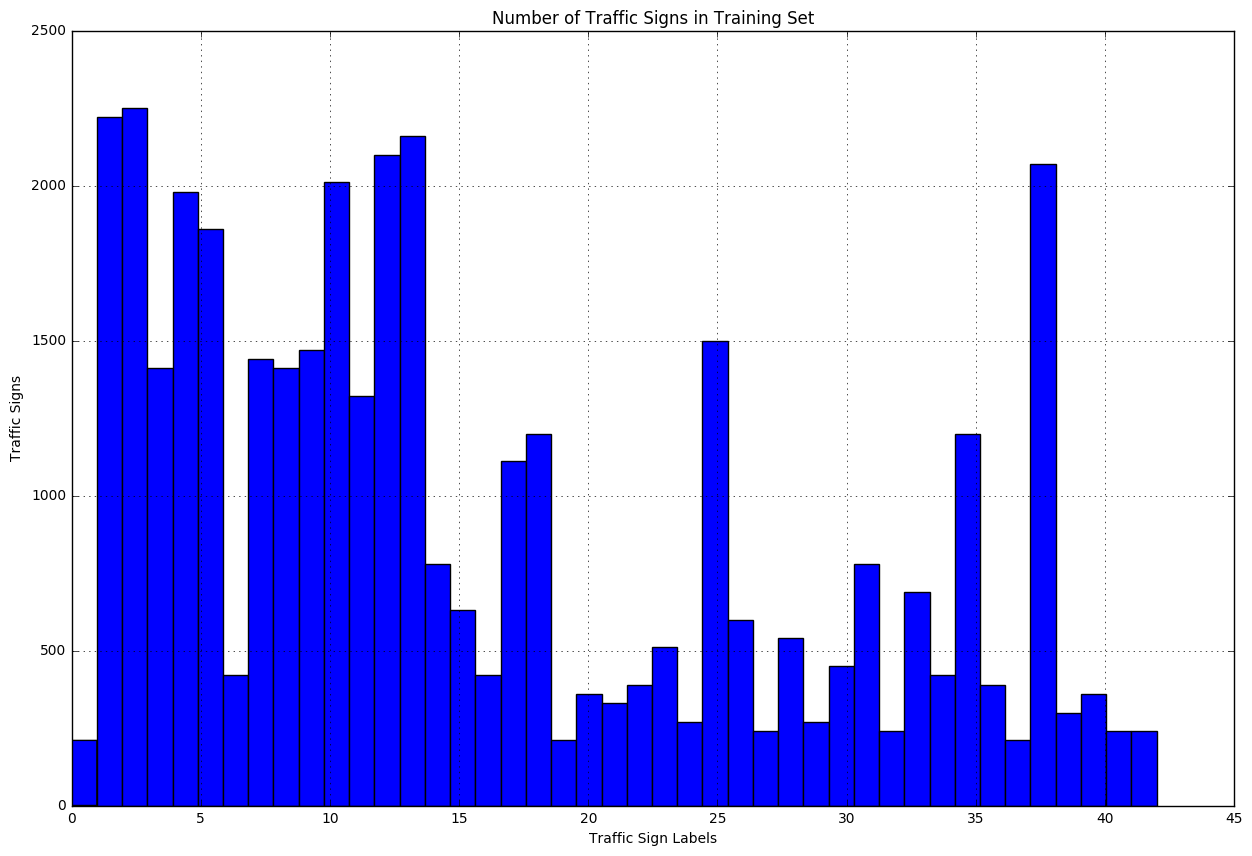

In [4]:
# Generate histogram of Training Set 
labels_count = len(np.unique(y_train))

plt.figure(figsize=(15,10))
n, bins, patches = plt.hist(y_train, labels_count, facecolor ='blue')

plt.xlabel('Traffic Sign Labels')
plt.ylabel('Traffic Signs')
plt.title('Number of Traffic Signs in Training Set')
plt.grid(True)

plt.show()



Random Images From Testing Set:


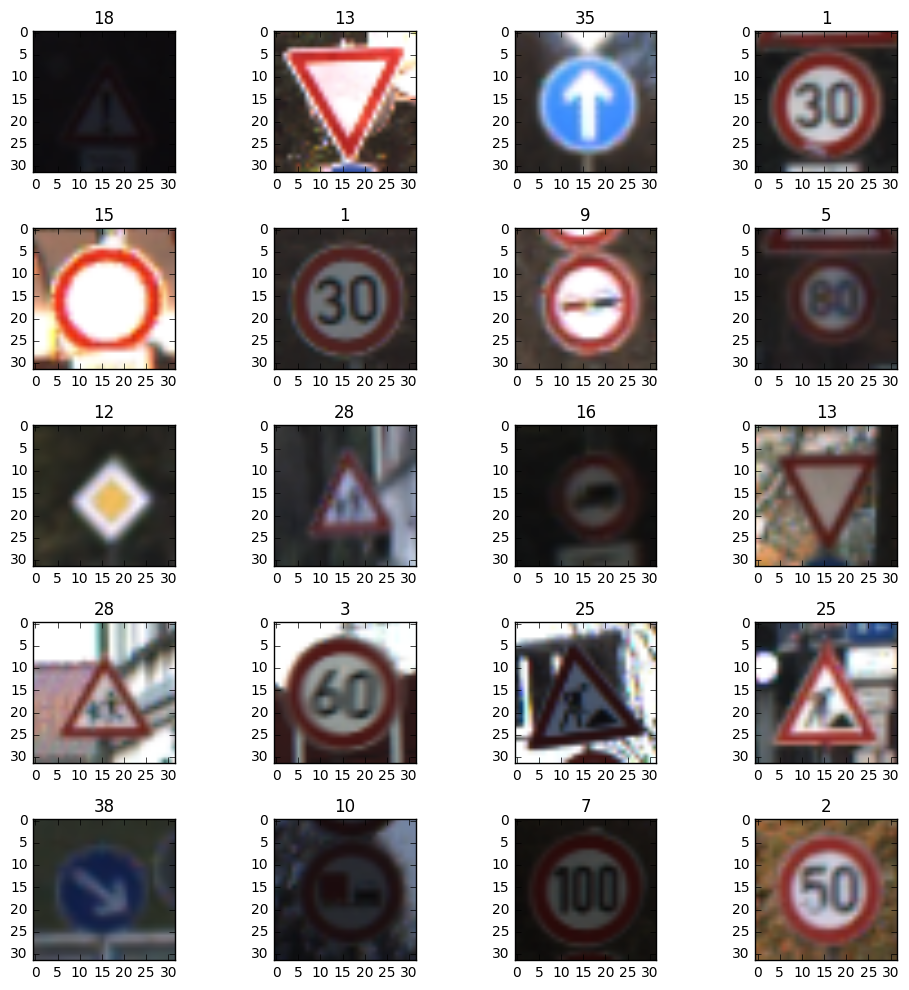

In [5]:
#Visualization of Testing Set 
print("Random Images From Testing Set:")
fig = plt.figure(figsize=(10,10))

# Display 20 random images from training set 
for i in range(0,20):
    index = random.randint(0, len(X_test)) # Generate a random index in the range of X_train 
    image = X_test[index].squeeze()
    
    # Generate a 5 x 4 array of subplots with each subplot containing its corresponding label index number
    ax = fig.add_subplot(5,4,i+1)
    fig.tight_layout()
    ax.imshow(image)
    plt.title(y_test[index])
plt.show()

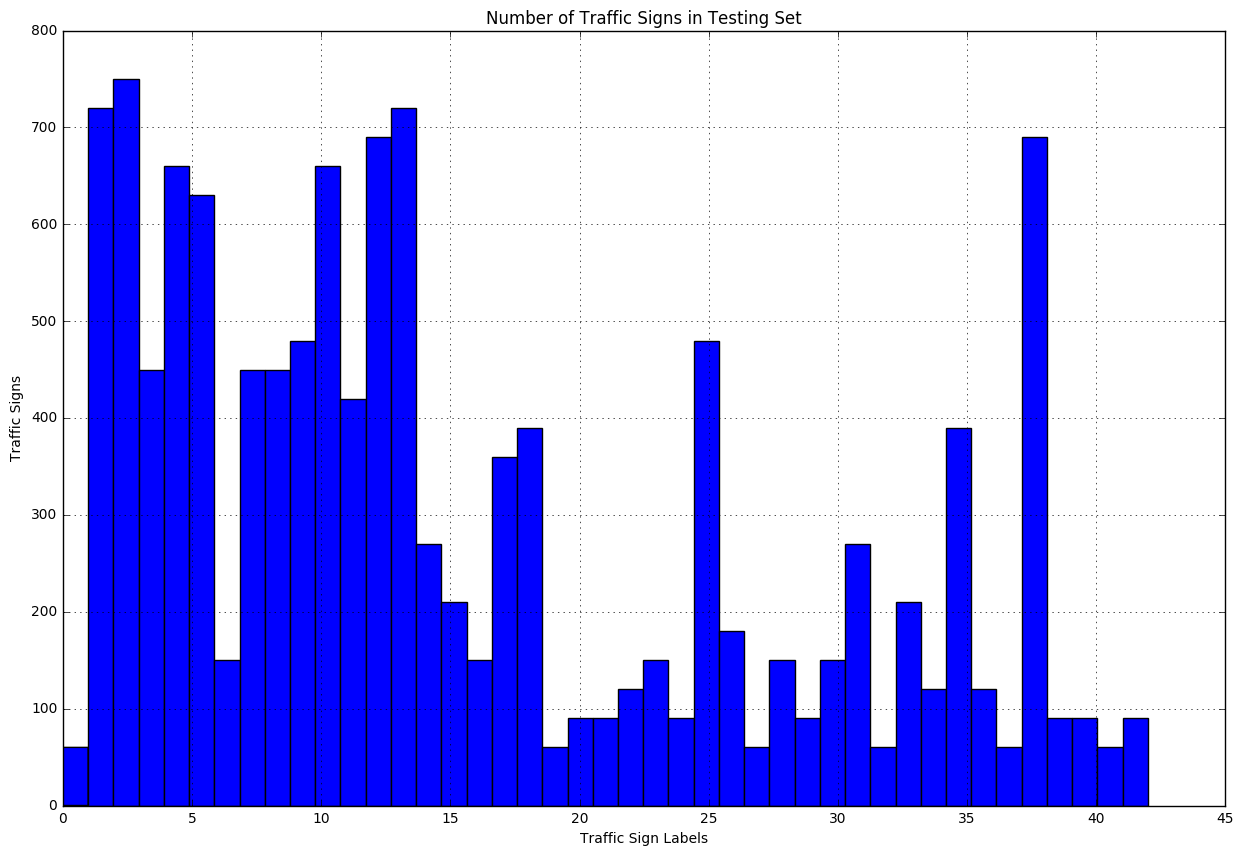

In [6]:
# Generate histogram of Testing Set 
labels_count = len(np.unique(y_test))

plt.figure(figsize=(15,10))
n, bins, patches = plt.hist(y_test, labels_count, facecolor ='blue')

plt.xlabel('Traffic Sign Labels')
plt.ylabel('Traffic Signs')
plt.title('Number of Traffic Signs in Testing Set')
plt.grid(True)

plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Shuffle the data to change the order
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print('Training set is shuffled.')

Training set is shuffled.


In [8]:
# Normalize images using Min-Max scaling
def normalize(image_data):
    a = 0.1
    b = 0.9
    color_min = 0
    color_max = 255
    
    return a + (((image_data - color_min) * (b - a)) / (color_max - color_min))

X_train = normalize(X_train)
X_test = normalize(X_test)

print('Images of training features and testing features are normalized.') 

Images of training features and testing features are normalized.


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The way I preprocessed the data was by first shuffling the data to change the order of it. This way the model doesn't train in a certain order and skew the results since the model would be able to capture the order of the data. I then normalized the images from 0.1 to 0.9 using min-max scaling. This technique of normalizing was found in the Tensor Flow lab. Normalization constrains the pixel values of the image to a smaller range allowing the distributions for each feature to be the same. As a result, the optimizer has an easier time descending. I preserved the colors in the images because color is a good indicator to distinguish features observed in an image. 

In [9]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

# Split data into training and validation sets 
print('Number of training features to split: ', len(X_train))

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print('Training and validation sets are split.') 
print('Number of training features: ', len(X_train))
print('Number of validation features ', len(X_validation))

Number of training features to split:  39209
Training and validation sets are split.
Number of training features:  31367
Number of validation features  7842


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

A validation set was generated from the original training set so that it can be used for cross-validation. I split the original training set into 80% for the training set and 20% for the validation set. Training was done using the training set. The validation set was tested during the training to see how the model was improving in accuracy. I did not use the testing set until I fine tuned my model and I was satisfied with it. I used the testing set when I evaluated my model in the end. 

In [98]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def Model(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    #conv1 = tf.nn.dropout(conv1, keep_prob) # Added a dropout Layer

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv1 = tf.nn.dropout(conv1, keep_prob) # Added a dropout Layer
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2 = tf.nn.dropout(conv2, keep_prob) # Added a dropout Layer
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv2 = tf.nn.dropout(conv2, keep_prob) # Added a dropout Layer 
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1    = tf.nn.dropout(fc1, keep_prob) # Added a dropout Layer

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #fc2    = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My architecture is based on the LeNet implentation that was discussed in the lectures. My model is adjusted so that it takes in RGB values instead of the grayscale values that the original LeNet model uses. There are a total of 5 layers in my model. The first two layers are convolutional layers. Layers 3, 4, and 5 are fully connected layers. Here is a detailed look at my architecture including layers and sizes: 

Layer 1: Convolutional --> Output = 28x28x6 (stride = 1x1)
         
        Activation (ReLU)
        Max Pooling --> Output = 14x14x6 (ksize = 2x2 and stride = 2x2)

Layer 2: Convolutional --> Output = 10x10x16 (stride = 1x1)
         
        Activation (ReLU)
        Max Pooling --> Output = 5x5x16 (ksize = 2x2 and stride = 2x2)
        Flatten --> Output = 400 

Layer 3: Fully Connected --> Output = 120
         
        Activation (ReLU)
        Dropout (Dropout rate is 50%)

Layer 4: Fully Connected --> Output = 84
         
        Activation(ReLU)
         
Layer 5: Fully Connected --> Output = 43

To find the new output heights and widths with VALID padding the following formulas were used: 

output_height = (input_height - filter_height + 1) / strides[1]

output_width = (input_width - filter_width + 1) / strides[2]

I chose to add a dropout layer at the end of the third layer after trying out different comibinations of dropout layers on the 5 layers in the model. Putting the dropout layer after the third layer gave me the best accuracy results on the test and validation sets with small loss during training. In the end, I was getting a test accuracy of about 99% and a validation accuracy close to 95%.  

In [99]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 30
BATCH_SIZE = 64


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [100]:
rate = 0.001

logits = Model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [101]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    
    return total_loss / num_examples, total_accuracy / num_examples

In [102]:
import time
start = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        training_loss, training_accuracy = evaluate(X_train, y_train)
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Training Loss = {:.3f}".format(training_loss))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'model')
    print("Model saved")
    
    elapsed = time.time() - start
    print("Time(sec): %s seconds" % elapsed)

Training...

EPOCH 1 ...
Training Loss = 1.000
Training Accuracy = 0.704
Validation Loss = 1.005
Validation Accuracy = 0.705

EPOCH 2 ...
Training Loss = 0.503
Training Accuracy = 0.861
Validation Loss = 0.508
Validation Accuracy = 0.859

EPOCH 3 ...
Training Loss = 0.291
Training Accuracy = 0.922
Validation Loss = 0.312
Validation Accuracy = 0.917

EPOCH 4 ...
Training Loss = 0.208
Training Accuracy = 0.947
Validation Loss = 0.223
Validation Accuracy = 0.941

EPOCH 5 ...
Training Loss = 0.142
Training Accuracy = 0.966
Validation Loss = 0.162
Validation Accuracy = 0.962

EPOCH 6 ...
Training Loss = 0.099
Training Accuracy = 0.976
Validation Loss = 0.125
Validation Accuracy = 0.971

EPOCH 7 ...
Training Loss = 0.111
Training Accuracy = 0.971
Validation Loss = 0.142
Validation Accuracy = 0.961

EPOCH 8 ...
Training Loss = 0.076
Training Accuracy = 0.980
Validation Loss = 0.103
Validation Accuracy = 0.974

EPOCH 9 ...
Training Loss = 0.065
Training Accuracy = 0.981
Validation Loss = 0.096

In [106]:
# Evaluate model on testing set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Model restored.")

    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Model restored.
Test Accuracy = 0.946


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The type of optimizer I used to train my model was the Adam optimizer with a learning rate of 0.001. I decided to keep the same optimizer that was used for the LeNet architecture found in the lectures. I used an epochs of 30 and a batch size of 64. A batch size of 64 gave me better validation accuracy results after trying 128 and 256 batch sizes. I left the epochs at 30 because after 30 epochs the validation accuracy and loss did not seem to change and would saturate. The hyperparameter mu was set at 0 and the hyperparameter sigma was set at 1. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

The process I took to come up with a solution to this problem was using trial and error. I started with the LeNet architecture that was featured in the lectures. The reason I chose this architecture was because LeNet is is good in classifying the MNIST image data set of handwritten digits in gray scale. Also, the LeNet model takes in 32x32 image sizes and the German traffic sign images are 32x32. I thought this same technique could be applied with the traffic sign images since the model would also be looking for features in a small area. Instead of using grayscale like in the MNIST case, I opted to use the RGB color scale because it would be a good indicator to distinguish features in an image. At first I did not change any parameters and I was getting about 90% in testing accuracy and a precentage in the high 80's for my validation accuracy. I tried changing the learning rate from 0.001 to smaller rate of 0.0001 but my training and validation accuracies decreased so I decided to stay with the default learning rate of 0.001. I changed the batch size from 128 to 256 and then to 64. With a batch size of 64 I was getting a validation accuracy of about 90% so I kept it. I also tried epochs of 10 and 20 and decided to stick with an epochs of 20 as my baseline since I saw that the accuracy increase with a greater number of epochs. I read on the forums that it was a good idea to include dropout layers throughout the network in order to minimize overfitting. I chose 50% for my keeping probability since that is what people were suggesting to use in the forums. I then included dropout layers after each convolutional and fully connected layers in my model. Specifically, I would put the dropout after maxpooling in the convolutional layers and after acttivation in the fully connected layers. Doing this significantly reduced my testing and validation accuracies to about a percentage in the 80's. I believe the reason this happpened is because I did not have a large enough network to handle all the dropouts I incorporated. In the future I could maybe increase the size of the filter and the size of the network to see if I get better accuracy when I implement dropouts after every covolutional and fully connected layer. After seeing the decrease in accuracy, I tried different combinations of dropouts in the different areas of the network. I tried putting dropouts in only the convolutional layers and then only in the fully connected layers. I even tried just putting one dropout in a covolutional layer or one dropout in the fully connected layer. After trying various combinations for a few hours I found that having the dropout after the third layer, which is a fully connected layer in my model gave me the best results in terms of accuracy and loss. I then tried using a batch sizes of 64, 128, and 256 just to see how the resuts changed and found that and found that a batch size of 64 still gave me the best results. The final thing I did was increase the epochs from 20 to 50 in order to see how the accuracy and loss changed with a larger time for training. When I changed the epochs to 50 I found that the accuracy and loss saturated at about an epochs of 30 so I chose 30 as my final epochs. The final validation accuracy I achieved was close to 95% with a training accuracy of 99%. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Candidate Images For Testing:


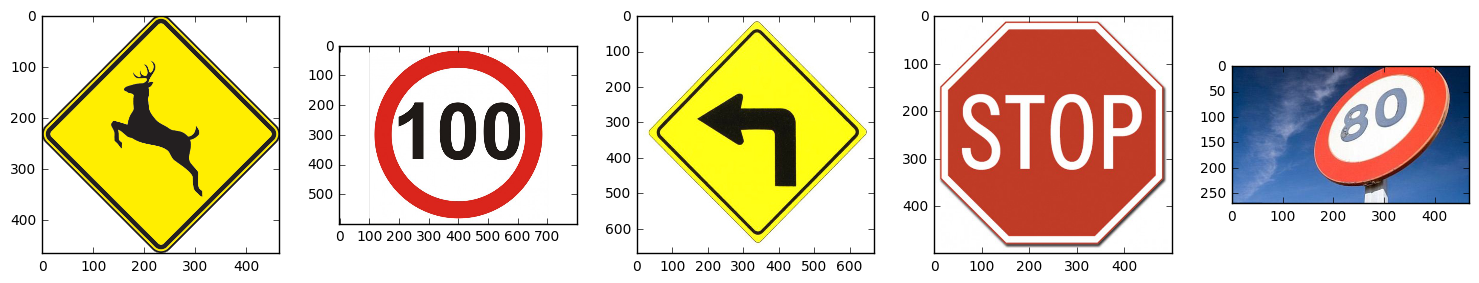

In [364]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg

filenames = ['deer_sign.png', '100km_h.jpg', 'turnleftahead.jpg', 'Stop_Sign.jpg', '80km_h.jpg']
print("Candidate Images For Testing:")

fig = plt.figure(figsize=(15,15))

# Display 5 candidate images for testing 
i = 0
for image in filenames:
    image = mpimg.imread('candidate_images/' + image)
    ax = fig.add_subplot(1,5,i+1)
    fig.tight_layout()
    ax.imshow(image)
    i += 1    

Candidate Images For Testing:


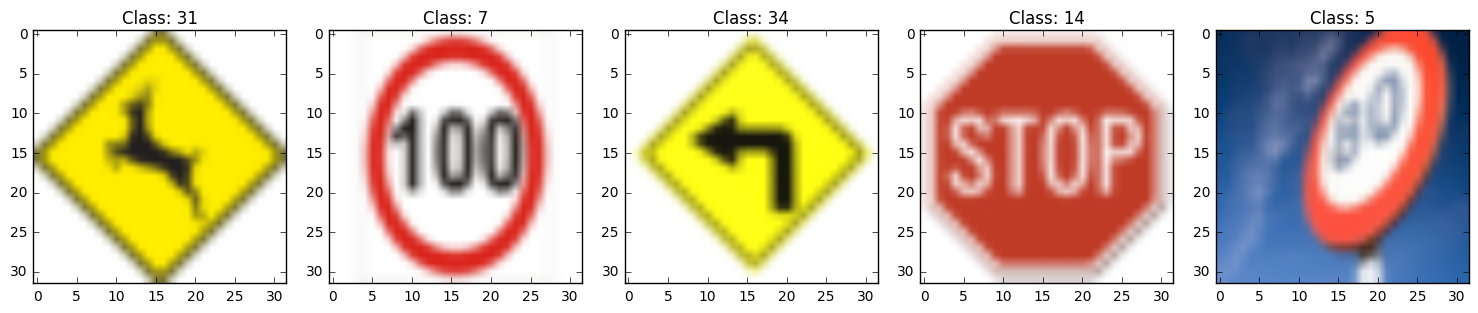

In [366]:
from scipy.misc import imresize
from PIL import Image 

filenames = ['deer_sign.png', '100km_h.jpg', 'turnleftahead.jpg', 'Stop_Sign.jpg', '80km_h.jpg']
print("Candidate Images For Testing:")
#print(filenames)

filename_labels = [7, 34, 14, 5, 31]


# Process and display 5 candidate images for testing 
images = []
label_names= {}
i = 0
fig = plt.figure(figsize=(15,15))

for image in filenames:
    image = Image.open('candidate_images/' + image)
    image = image.convert('RGB') # Convert image to RGB format
    
    image_new = imresize(image,(32,32,3)) # Resize image to 32x32x3
    
    ax = fig.add_subplot(1,5,i+1)
    fig.tight_layout()
    plt.title('Class: {}'.format(filename_labels[i-1]))
    ax.imshow(image_new)
    
    
    image_new = normalize(image_new)
    #image_new = image_new.reshape(32,32,3)
    images.append(image_new)
    i += 1   
#print(image_new)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The 5 candididate Images I chose are shown and plotted above. I chose 2 U.S. traffic signs to see if my model could classify them. One of them is a yellow deer sign and the other one is a yellow turn left ahead sign. These two signs would make classification difficult because they are different from the German traffic signs but the labeling has similar characteristics. I also chose 2 signs that are similar to the German traffic signs. One is the 100 km/h sign and the other is the Stop sign. The last sign I chose is a 80 km/h sign that has similar characteristics to the 80 km/h sign found in the german traffic signs data. The difference is that the candidate image was taken at an angle instead of straight on which I thought would make it harder to classify. The candidate images were of different sizes so I had to resize them so that they were 32x32 in size. Once I did this there was some loss in resolution. The loss of resolution could also make it tough for classification. 

In [311]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import csv


label_names = {}
with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for (label, name) in reader:
        #print(label)
        #print(name)
        label_names[label] = name
    #print(label_names['17'])

with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    #new_saver = tf.train.import_meta_graph("model.meta")
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Model restored.")
    
    prediction = tf.nn.softmax(logits)
    values, indices = sess.run(tf.nn.top_k(prediction, k=5), feed_dict={x: images, keep_prob: 1.0})
    
    #print(values[0])
    #print(indices[0])
    #print(filenames[4])

    i = 0 
    print("")
    print("{:20}{:10}{:15}".format("Filename:", "Class:", "Prediction"))
    for p in indices:
        #print(p)
        #print(str(p))

        
        print("{:20}{:<10}{:15}".format(filenames[i], p[0], label_names[str(p[0])]))
        #print(str(indices[i][0]))
        print("")
        i += 1
    


Model restored.

Filename:           Class:    Prediction     
deer_sign.png       3         Speed limit (60km/h)

100km_h.jpg         7         Speed limit (100km/h)

turnleftahead.jpg   17        No entry       

Stop_Sign.jpg       14        Stop           

80km_h.jpg          14        Stop           



In [363]:
print(values)
print("")
print("")
print(indices)

[[  7.45773792e-01   2.14300394e-01   1.34945167e-02   6.06009737e-03
    4.55123652e-03]
 [  9.99847531e-01   1.48158302e-04   3.86346801e-06   3.96597869e-07
    3.73780473e-08]
 [  9.08839464e-01   3.96965146e-02   3.54996957e-02   1.51106324e-02
    6.00717904e-04]
 [  9.99999285e-01   7.11551706e-07   3.40433921e-08   1.22593509e-08
    9.48641388e-10]
 [  9.62348819e-01   3.56118642e-02   1.46228308e-03   1.89289174e-04
    1.38685296e-04]]


[[ 3 23 30  7 19]
 [ 7 16 42 11 40]
 [17  4  8 14  0]
 [14  1 25  5 12]
 [14 13  5  1  2]]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

My model was able to predict 2 out of the 5 candidate signs correctly. It was 40% accurate. The 2 signs that the model predicted correctly were the ones that looked similar to the german traffic signs. These were the 100 km/h sign and the stop sign. The model was not able to predict the U.S. traffic signs which were the yellow deer sign and the yellow turn left ahead sign. These traffic signs are different from the German traffic signs in characteristics. The majority of the U.S. signs I chose are covered in yellow, while the German traffic signs do not have this feature. This may have caused the model to get confused when classifying the signs. The other traffic sign that the model was not able to predict was the 80 km/h sign. This could have been because the image was taken at an angle and not straight on. Also, the 80 km/h sign does not take the majority of the space in the image since a good portion of the sky is being shown in the image. 

Prediction: (3) Speed limit (60km/h)
Correct: (31) deer_sign.png


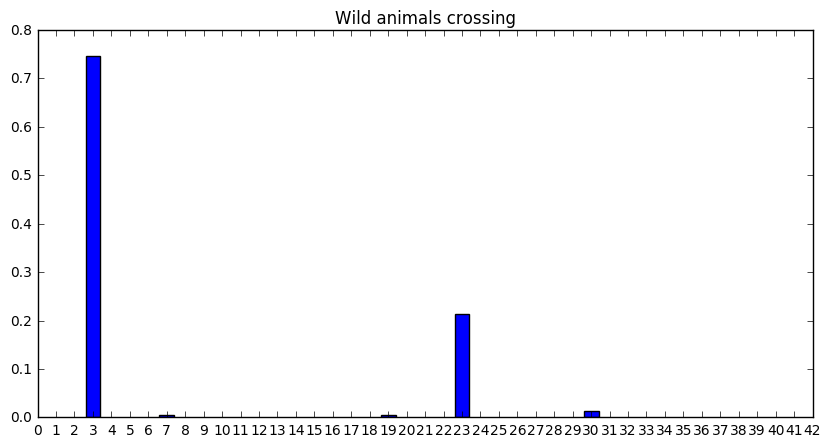



Prediction: (7) Speed limit (100km/h)
Correct: (7) 100km_h.jpg


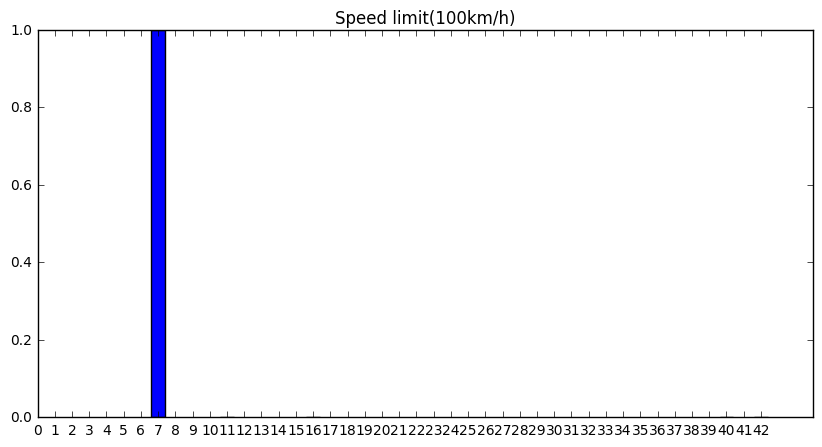



Prediction: (17) No entry
Correct: (34) turnleftahead.jpg


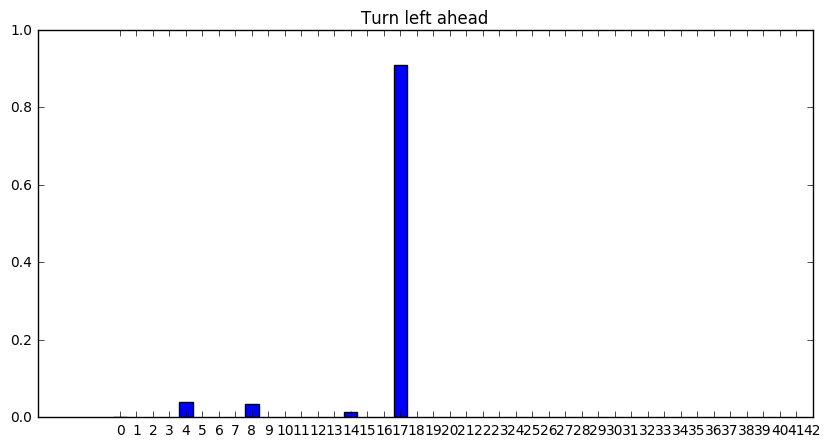



Prediction: (14) Stop
Correct: (14) Stop_Sign.jpg


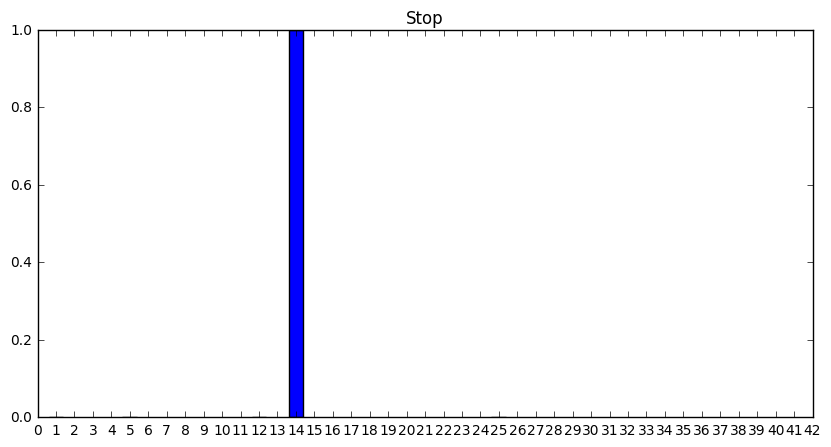



Prediction: (14) Stop
Correct: (5) 80km_h.jpg


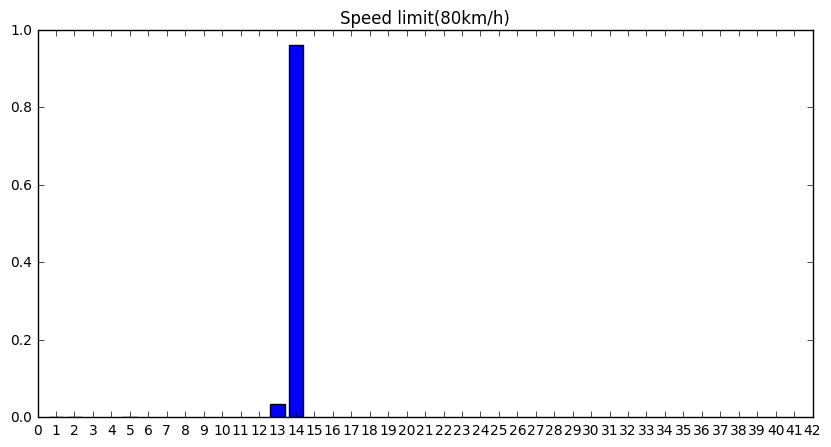

In [361]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

titles=['Wild animals crossing','Speed limit(100km/h)','Turn left ahead','Stop','Speed limit(80km/h)']
#plt.figure(figsize=(16,9))
for i in range(len(values)):
    #print(len(values))
    #print(i)
    #print(indices[4])
    print("Prediction: ({}) {}".format(indices[i][0],label_names[str(indices[i][0])]))
    print("Correct: ({}) {}".format(filename_labels[i-1], filenames[i]))
    
    plt.figure(figsize=(10,5))
    plt.bar(indices[i],values[i], align='center')
    plt.xticks(np.arange(43))
    plt.title(titles[i])
    plt.show()
    print("")
    print("")

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

My model was was most certain on its predictions with images that looked similar to the German traffic signs. To make an accurate prediction it seems that the traffic signs have to take the majority of the space in the image and have to be taken straight on. The first candidate image was misclassified as speed limit 60 km/h instead of wild animals crossing. The correct prediction was not present in any of the 5 positions in the top k. The second and fourth candidate images were correctly classified as speed limit 100 km/h and stop sign respectively. The third image was misclassified as no entry instead of left turn ahead. The correct prediction was not present in any of the 5 positions in the top k. The fifth image was misclassified as a stop sign instead of speed limit 80 km/h. The correct prediction was present in position 3 in the top k with a really low probability. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.